In [10]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

#FROM the sample data of one day to conacatinate all the csv files of each hour into a single one

directory = '/Users/thomas/Desktop/Desktop/phd_unipv/Industrial_PhD/Data/20241126/csv_acc'

one_hr_datframes= []

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        
        df = pd.read_csv(file_path, sep=';')

        df_two_col = df[['time','03091002_x']]

        one_hr_datframes.append(df_two_col)

#dataframe file conatining one day data 
master_df = pd.concat(one_hr_datframes, ignore_index=True)


In [11]:

#converting the one day dataframe to a single csv file
master_df.to_csv('master_file_day.csv', index= False)

#converting time column to datetime to recognise the dates
master_df['time'] = pd.to_datetime(master_df['time'], format='%Y/%m/%d %H:%M:%S:%f')

In [12]:
master_df.head()


,time,03091002_x
0,2024-11-26 07:00:00.000,1.022700
1,2024-11-26 07:00:00.010,1.021246
2,2024-11-26 07:00:00.020,1.019743
3,2024-11-26 07:00:00.030,1.024803
4,2024-11-26 07:00:00.040,1.024315


In [13]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   03091002_x  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 131.8 MB


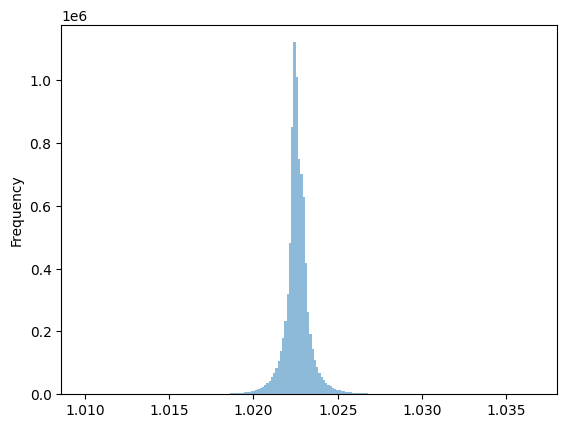

In [14]:
histogram = master_df['03091002_x'].plot.hist(bins=200, alpha=0.5)

In [15]:
#selecting the datetime column to index for resampling 
master_df = master_df.set_index('time')

master_df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8640000 entries, 2024-11-26 07:00:00 to 2024-11-26 05:59:59.990000
Data columns (total 1 columns):
 #   Column      Dtype  
---  ------      -----  
 0   03091002_x  float64
dtypes: float64(1)
memory usage: 131.8 MB


In [23]:
#resampling by min freq
df_by_min = master_df.resample('T').mean()

print(df_by_min)

                     03091002_x
time                           
2024-11-26 00:00:00    1.022573
2024-11-26 00:01:00         NaN
2024-11-26 00:02:00    1.022562
2024-11-26 00:03:00    1.022569
2024-11-26 00:04:00    1.022565
...                         ...
2024-11-26 23:55:00    1.022623
2024-11-26 23:56:00    1.022619
2024-11-26 23:57:00    1.022612
2024-11-26 23:58:00    1.022615
2024-11-26 23:59:00    1.022618

[1440 rows x 1 columns]


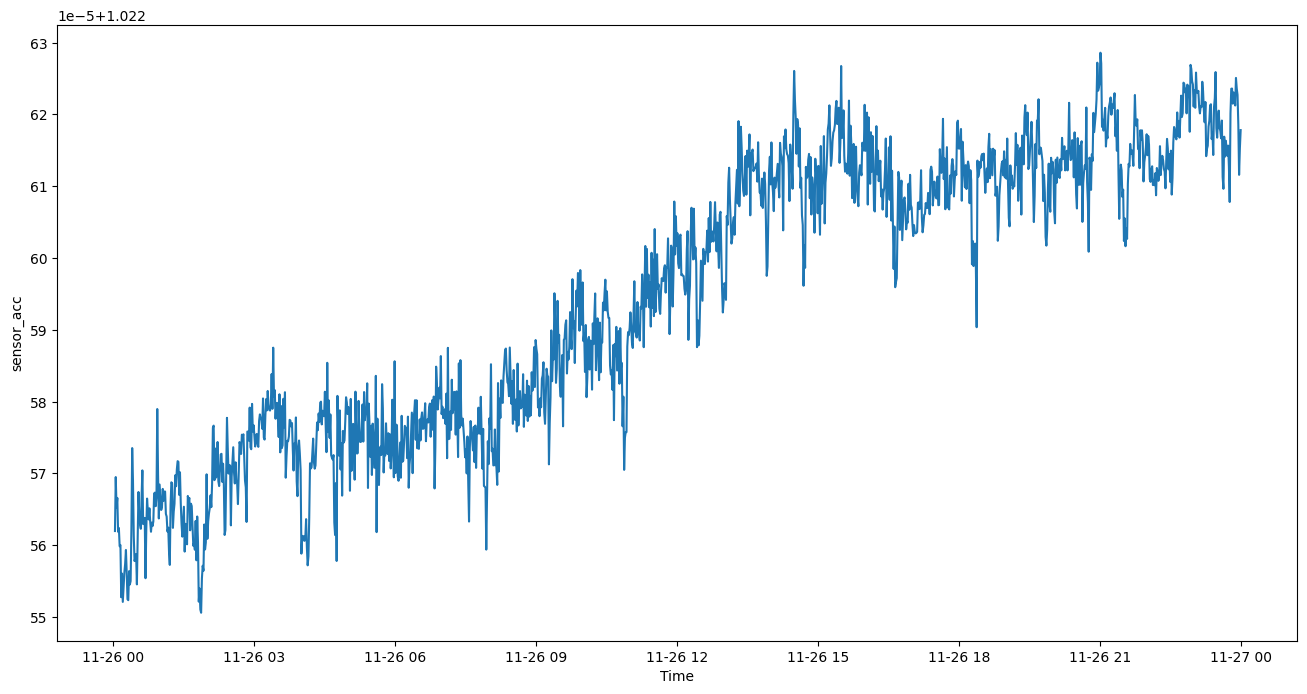

In [29]:
#df_by_min['03091002_x'].plot(figsize=(15,5))

plt.figure(figsize=(16,8))
plt.plot(df_by_min['03091002_x'])
plt.xlabel('Time')
plt.ylabel('sensor_acc')
plt.savefig('min_daily_sensor_data.png')
plt.show()


In [18]:
#resampling by second freq
df_by_sec = master_df.resample('S').mean()

print(df_by_sec)


                     03091002_x
time                           
2024-11-26 00:00:00    1.022573
2024-11-26 00:00:01         NaN
2024-11-26 00:00:02         NaN
2024-11-26 00:00:03         NaN
2024-11-26 00:00:04         NaN
...                         ...
2024-11-26 23:59:55    1.022644
2024-11-26 23:59:56    1.022483
2024-11-26 23:59:57    1.022538
2024-11-26 23:59:58    1.022576
2024-11-26 23:59:59    1.022612

[86400 rows x 1 columns]


<AxesSubplot: xlabel='time'>

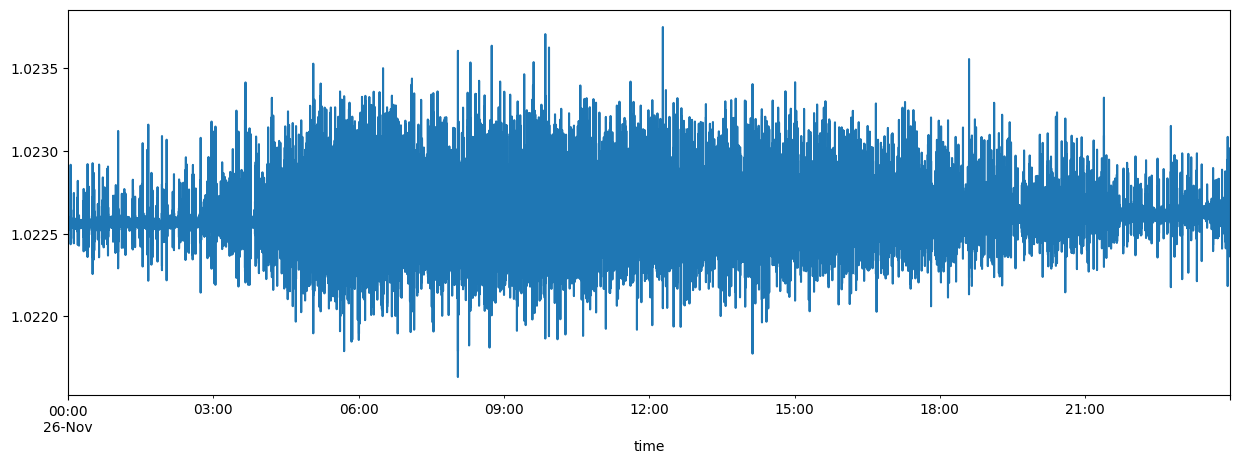

In [19]:
df_by_sec['03091002_x'].plot(figsize=(15,5))

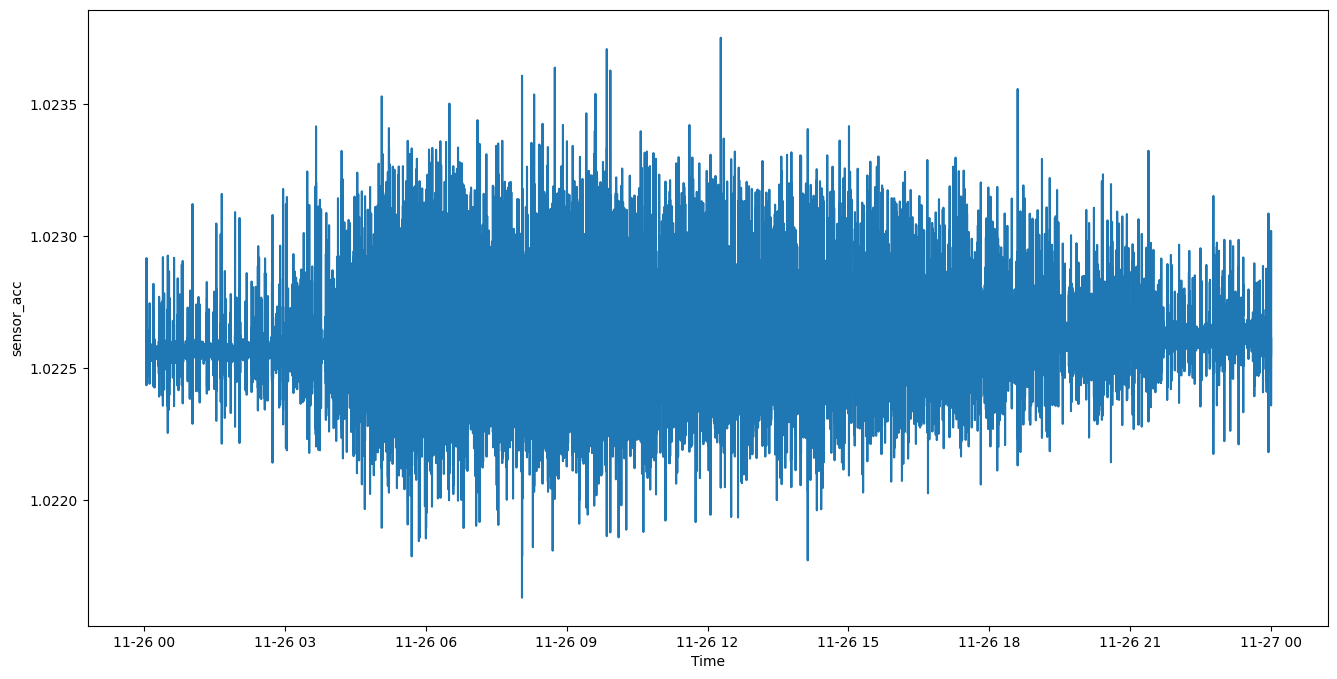

In [28]:

plt.figure(figsize=(16,8))
plt.plot(df_by_sec['03091002_x'])
plt.xlabel('Time')
plt.ylabel('sensor_acc')
plt.savefig('sec_daily_sensor_data.png')
plt.show()
